# Python: Introduction to Machine Learning

## Import Libraries 

In [13]:
import pandas as pd 
import matplotlib.pyplot as plt 

# !pip install seaborn # if you do not have seaborn already installed on your device 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm

%matplotlib inline # Display Matplotlib graphs within the Notebook (and note as separate window pop-ups)

UsageError: unrecognized arguments: # Display Matplotlib graphs within the Notebook (and note as separate window pop-ups)


## Import Data 

In [14]:
df = pd.read_csv('Data/loan_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Exploratory Data Analysis (EDA)

- EDA is an important step in the ML/Data Science pipeline 
- Gain a high-level understanding of the data and its characteristics (data types, rows, columns, missing values, etc.)  
- This step helps provide guidance on how to pre-process the data to prep it for model building 

In [15]:
# Display data about the data (nulls, data types, rows/columns, etc.)
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [16]:
# Count - Missing Values
df.isnull().sum() 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
# Display statistical summary for the data 
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [18]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [24]:
# List of Unique Values in all of the categorical columns 

categorical_cols = ['Gender','Married','Education','Self_Employed', 'Property_Area']

for col in categorical_cols:
    print(f'Unique Values for {col}: {df[col].unique()}')

Unique Values for Gender: ['Male' 'Female' nan]
Unique Values for Married: ['No' 'Yes' nan]
Unique Values for Education: ['Graduate' 'Not Graduate']
Unique Values for Self_Employed: ['No' 'Yes' nan]
Unique Values for Property_Area: ['Urban' 'Rural' 'Semiurban']


In [28]:
# Checking for any repeated records with regards to Loan ID
len(df.Loan_ID.unique())

614

#### Let's Summarize! 
- Loan ID is the primary key in the data - it uniquely identifies each record 
- There are 614 rows, 13 columns
- The .describe() function can be used to quickly gauge some statistics about the data 
    - In some cases it can also help identify some incorrect data (if this was a biometric dataset with heart-rate, an minimum heartrate of 0 would be a call for investigation!) 
- 7/13 columns have missing values 
- Credit History has the highest number of missing values! 

#### Key Remarks 
- Understanding the data you are working with is very important! 
- Always strive to work with Subjet Matter Experts (SMEs) to get insight into the data 
- In a real-world application, you may need to individually evaluate each column and its values to learn the context behind the data 

## Data Analysis
- Investigate to find relationships and trends within the data 
- Certain features may be more prominent in determining whether the applicant's loan with be approved or not 

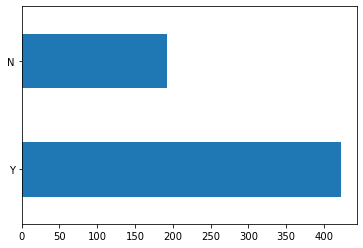

In [29]:
# Number of Approved & Not Approved (Y/N) records 
df.Loan_Status.value_counts().plot(kind='barh')

In [30]:
print(df.Loan_Status.value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


#### Gender vs Approval 

C:\Users\sbhati\Anaconda3\envs\personal\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


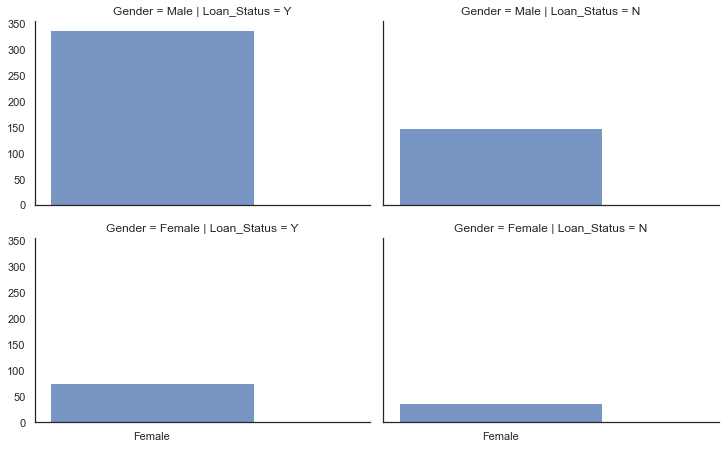

In [37]:
gen_plot = sns.FacetGrid(df, col = 'Loan_Status', row='Gender', size=3.2, aspect=1.6)
gen_plot.map_dataframe(sns.histplot, x='Gender')

In [50]:
# Numeric Counts 
y_male = len(df[(df.Gender == 'Male') & (df.Loan_Status=='Y')])
n_male = len(df[(df.Gender == 'Male') & (df.Loan_Status=='N')])

y_female = len(df[(df.Gender == 'Female') & (df.Loan_Status=='Y')])
n_female = len(df[(df.Gender == 'Female') & (df.Loan_Status=='N')])

print(f'Male(Yes): {y_male} | Male(No): {n_male}')
print(f'Female(Yes): {y_female} | Female(No): {n_female}')

Male(Yes): 339 | Male(No): 150
Female(Yes): 75 | Female(No): 37


#### Dependents vs Approval

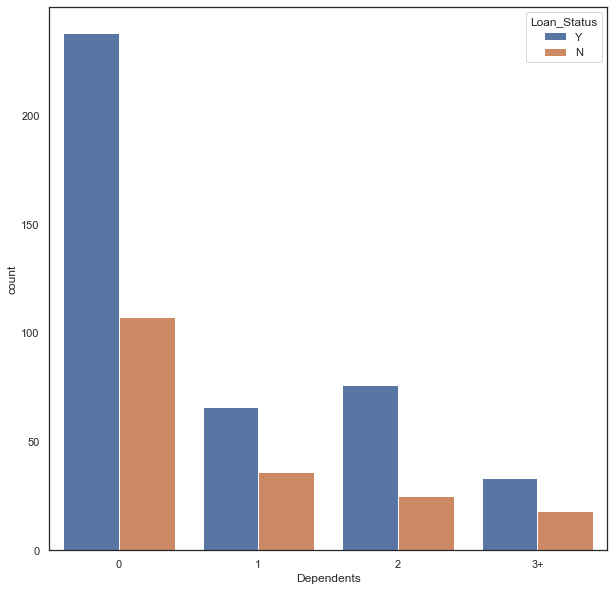

In [58]:
plt.figure(figsize=(10,10))
sns.countplot(x='Dependents', hue='Loan_Status', data=df)

In [60]:
# Investigate the spread of the data for Dependents 

dep_count = df.Dependents.value_counts()
print(dep_count)

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


#### Applicant Income vs Approval 

In [62]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

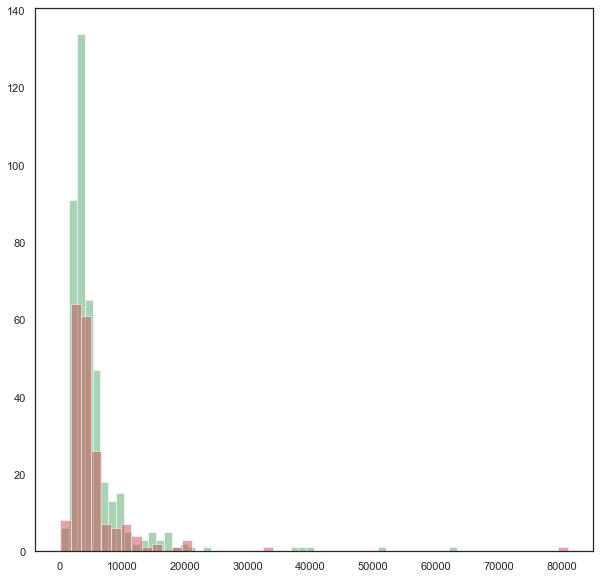

In [74]:
# Histogram

y_loan = df.loc[df.Loan_Status == 'Y']
n_loan = df.loc[df.Loan_Status == 'N']

kwargs = dict(alpha=0.5, bins=50)

plt.figure(figsize=(10,10))
plt.hist(y_loan['ApplicantIncome'], **kwargs, color='g')
plt.hist(n_loan['ApplicantIncome'], **kwargs, color='r')
plt.show()

#### Let's Summarize 

- There is an imbalance in our data! There are about 2x more records for approved loans than non-approved
- Gender does not seem like an important feature based on the the analysis, so we will leave it out of our model 
- We will leave dependents in the in the model as relationships with other features could provide more insight 

#### Key Remarks! 

- Take a look at data from multiple perspectives 
- Some of the questions that arise from this data could perhaps be answered/validated by a SME! 
- 


## Model Development

### Data Preparation

### Model Creation

### Model Evaluation

## Hypterparamter Tuning

## Model Testing

## Considerations 
 - Test out different algorithms -> Random Forest for Regression 
 - Iterate over the feature selection process 
 - Feature Engineering: Develop your own features from the available data 
